In [1]:
# Import library @@GauravLute@@
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import pyplot 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Series
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima import auto_arima
from math import sqrt 
from sklearn.metrics import mean_squared_error
import warnings 
import time

In [2]:
df_2 = pd.read_csv('catfish.csv') # load given datasets

In [3]:
df_2['Date'] = pd.to_datetime(df_2['Date']) 

In [4]:
df_2.head(10)

,Date,Total
0,1986-01-01,9034
1,1986-02-01,9596
2,1986-03-01,10558
3,1986-04-01,9002
4,1986-05-01,9239
5,1986-06-01,8951
6,1986-07-01,9668
7,1986-08-01,10188
8,1986-09-01,9896
9,1986-10-01,10649


In [5]:
df_2.set_index('Date', inplace=True) # set index values

In [6]:
df_2.head(10) # visualize first 10 rows

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
1986-06-01,8951
1986-07-01,9668
1986-08-01,10188
1986-09-01,9896


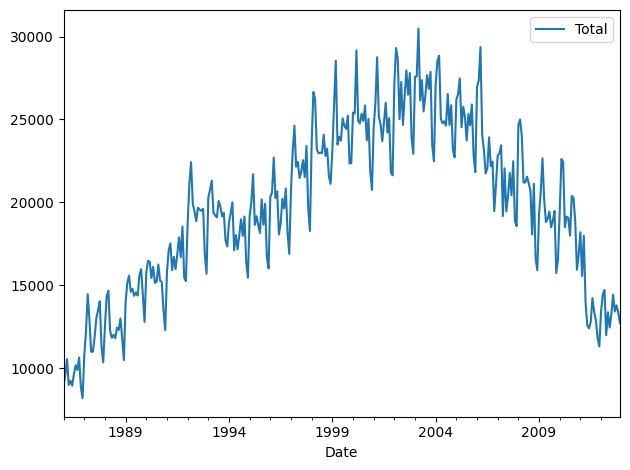

In [ ]:
# Visualize the data
df_2['Total'].plot(legend=True)
plt.tight_layout()
plt.show()

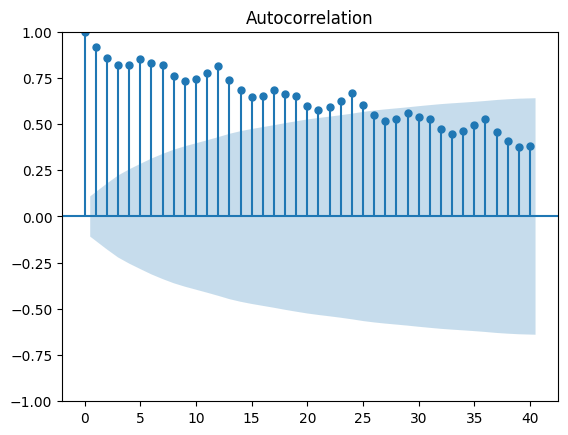

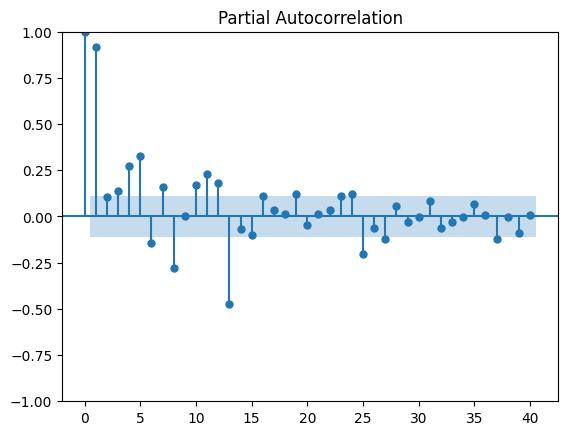

In [ ]:
plot_acf(df_2['Total'], lags=40)  #plot acf
plot_pacf(df_2['Total'], lags=40) # plot pacf
plt.show()

In [ ]:
train_size = int(len(df_2)*0.80) # split dataset using indexing
train_data_2, test_data_2 = df_2[0:train_size], df_2[train_size:]

In [ ]:
train_size, train_data_2.shape, test_data_2.shape

(259, (259, 1), (65, 1))

In [ ]:
start_2 = len(train_data_2)
end_2 = len(train_data_2)+ len(test_data_2) -1

In [ ]:
model_4 = ARIMA(train_data_2, order=(1,0,1)) # build Arima model
model_4 = model_4.fit()
model_4.summary()

c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  259
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2318.444
Date:                Tue, 20 May 2025   AIC                           4644.888
Time:                        15:51:51   BIC                           4659.115
Sample:                    01-01-1986   HQIC                          4650.608
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.016e+04   5432.503      3.711      0.000    9513.287    3.08e+04
ar.L1          0.9963      0.006    177.199      0.000       0.985       1.007
ma.L1         -0.7030      0.046    -15.245      0.000      -0.793      -0.613
sigma2      3.445e+06     20.053   1.72e+05      0.000    3.45e+06    3.45e+06
===================================================================================
Ljung-Box (L1) (Q):                  20.16   Jarque-Bera (JB):                 4.52
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               1.80   Skew:                             0.32
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.19e+20. Standard errors may be unstable.
"""

In [ ]:
pred_4 = model_4.predict(start = start_2, end = end_2, type= 'levels')

c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
pred_4.index = df_2.index[start_2: end_2+1]

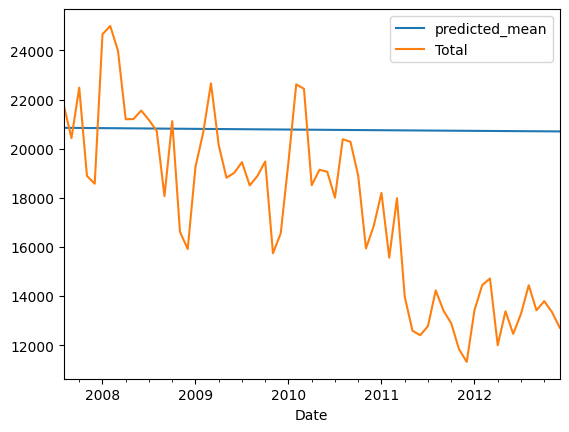

In [ ]:
pred_4.plot(legend=True)
test_data_2['Total'].plot(legend=True)
plt.show()

In [ ]:
start_2

259

In [ ]:
end_2

323

In [ ]:
len(pred_4)

65

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(pred_4, test_data_2['Total'])
print(mae)

3844.4976272673234


Grid Search 

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [ ]:
def check_stationarity(series, max_diff_order=2, alpha=0.05):
    """
    Check stationarity of a time series using the Augmented Dickey-Fuller (ADF) test.
    If the series is not stationary, apply differencing recursively until stationarity is achieved.
    
    Parameters:
    - series: pandas Series, the time series data
    - max_diff_order: int, maximum order of differencing to be applied (default: 2)
    - alpha: float, significance level for ADF test (default: 0.05)
    
    Returns:
    - stationary_series: pandas Series, the stationary time series
    """
    # Perform ADF test
    adf_result = adfuller(series)
    p_value = adf_result[1]
    
    # If the series is already stationary, return the original series
    if p_value < alpha:
        print("Original series is stationary (p-value: {:.4f})".format(p_value))
        return series
    
    
    
    # If the series is not stationary, apply differencing
    print("Original series is not stationary (p-value: {:.4f}), applying differencing...".format(p_value))
    for diff_order in range(1, max_diff_order + 1):
        differenced_series = series.diff(diff_order).dropna()
        adf_result_diff = adfuller(differenced_series)
        p_value_diff = adf_result_diff[1]
        
        # Check stationarity after differencing
        if p_value_diff < alpha:
            print("Series after {} order differencing is stationary (p-value: {:.4f})".format(diff_order, p_value_diff))
            return differenced_series
        
    # If maximum differencing orders reached and still not stationary, return None
    print("Maximum differencing orders reached. Unable to achieve stationarity.")
    return None

# Example usage:
# Assuming 'time_series' is your pandas Series containing the time series data
# stationary_series = check_stationarity(time_series)

In [ ]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset0)):
        value = dataset[i] + dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [ ]:
# check stationarity or not if not stationary return differencing 
stat = check_stationarity(df_2['Total'])

Original series is not stationary (p-value: 0.4887), applying differencing...
Series after 1 order differencing is stationary (p-value: 0.0004)


In [ ]:
def evaluate_arima_model(X, arima_order):
 # prepare training dataset
 train_size = int(len(X) * 0.80)
 train, test = X[0:train_size], X[train_size:]
 history = [x for x in train]
 predictions = list()
 for t in range(len(test)):
     model = ARIMA(history, order=arima_order)
     model_fit = model.fit()
     yhat = model_fit.forecast()[0]
     predictions.append(yhat)
     history.append(test[t])
 # # calculate out of sample error
 rmse = sqrt(mean_squared_error(test, predictions))
 return rmse,predictions

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse,predictions = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return predictions


In [ ]:
# check best combination 
#%%time
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
predictions_f=evaluate_models(df_2['Total'], p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=4291.542
ARIMA(0, 0, 1) RMSE=2752.009
ARIMA(0, 0, 2) RMSE=2667.483
ARIMA(0, 1, 0) RMSE=1981.805
ARIMA(0, 1, 1) RMSE=1957.827
ARIMA(0, 1, 2) RMSE=1842.939
ARIMA(0, 2, 0) RMSE=2997.527
ARIMA(0, 2, 1) RMSE=1989.022
ARIMA(0, 2, 2) RMSE=2026.178
ARIMA(1, 0, 0) RMSE=1950.944
ARIMA(1, 0, 1) RMSE=1967.729
ARIMA(1, 0, 2) RMSE=1853.138
ARIMA(1, 1, 0) RMSE=1964.315
ARIMA(1, 1, 1) RMSE=1860.605
ARIMA(1, 1, 2) RMSE=1845.211
ARIMA(1, 2, 0) RMSE=2672.917
ARIMA(1, 2, 1) RMSE=1972.647
ARIMA(1, 2, 2) RMSE=1971.873
ARIMA(2, 0, 0) RMSE=1944.413
ARIMA(2, 0, 1) RMSE=1873.231
ARIMA(2, 0, 2) RMSE=1847.426
ARIMA(2, 1, 0) RMSE=1912.153
ARIMA(2, 1, 1) RMSE=1840.219
ARIMA(2, 1, 2) RMSE=1933.174
ARIMA(2, 2, 0) RMSE=2499.561
ARIMA(2, 2, 1) RMSE=1920.847
ARIMA(2, 2, 2) RMSE=1903.642
Best ARIMA(2, 1, 1) RMSE=1840.219


Auto ARIMA

In [ ]:
stepwise_fit_2=auto_arima(train_data_2,start_p=0, start_q=0,d=1,
                           max_p=40, max_q=40,information_criterion='bic',trace=True,suppress_warnings=True,stepwise=True,seasonal=False)
stepwise_fit_2.summary()

In [ ]:
model_3=ARIMA(train_data_2,order=(4,1,3))
model_3=model_3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  259
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2231.495
Date:                Tue, 20 May 2025   AIC                           4478.991
Time:                        15:54:01   BIC                           4507.414
Sample:                    01-01-1986   HQIC                          4490.420
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0314      0.083    -12.425      0.000      -1.194      -0.869
ar.L2         -0.3176      0.146     -2.171      0.030      -0.604      -0.031
ar.L3         -0.2221      0.135     -1.649      0.099      -0.486       0.042
ar.L4         -0.5288      0.071     -7.495      0.000      -0.667      -0.391
ma.L1          0.9692      0.091     10.632      0.000       0.791       1.148
ma.L2         -0.2428      0.151     -1.607      0.108      -0.539       0.053
ma.L3         -0.6656      0.096     -6.967      0.000      -0.853      -0.478
sigma2      2.131e+06   1.17e-08   1.82e+14      0.000    2.13e+06    2.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.39   Prob(JB):                         0.17
Heteroskedasticity (H):               1.42   Skew:                             0.27
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.76e+30. Standard errors may be unstable.
"""

In [ ]:
pred_3=model_3.predict(start=start_2,end=end_2,type='levels')


In [ ]:
pred_3


2007-08-01    22583.813878
2007-09-01    20998.795994
2007-10-01    22474.347260
2007-11-01    20475.819409
2007-12-01    21254.004629
                  ...     
2012-08-01    21961.756316
2012-09-01    20463.188599
2012-10-01    22195.553413
2012-11-01    20690.923498
2012-12-01    21568.565200
Freq: MS, Name: predicted_mean, Length: 65, dtype: float64

In [ ]:
pred_3.index=df_2.index[start_2:end_2+1]


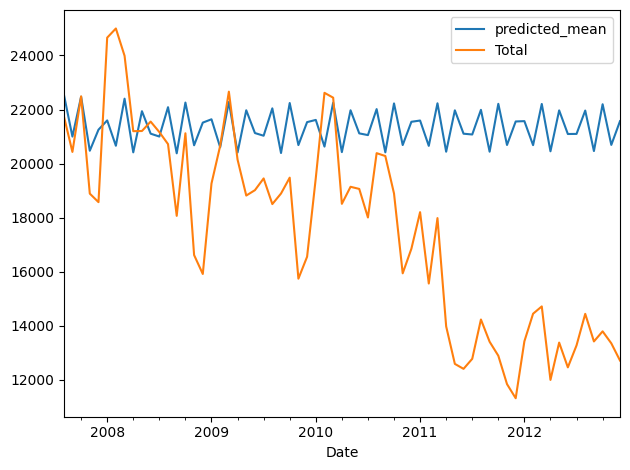

In [ ]:
pred_3.plot(legend=True)
test_data_2['Total'].plot(legend=True)
plt.tight_layout()

In [ ]:
from sklearn.metrics import mean_absolute_error


In [ ]:
rmse=sqrt(mean_squared_error(pred_3,test_data_2['Total']))
print(rmse)

5182.48227838364


In [ ]:
test_data_2['Total'].mean()

np.float64(17581.33846153846)

In [ ]:
model_future=ARIMA(df_2['Total'],order=(4,1,3))
model_future=model_future.fit()

In [ ]:
df_2.tail()


,Total
Date,
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795
2012-11-01,13352
2012-12-01,12716


In [ ]:
index_future=pd.date_range(start='2012-12-01',end='2013-08-01',freq='M')


In [ ]:
index_future

DatetimeIndex(['2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31',
               '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
pred_future=model_future.predict(start=len(df_2),end=len(df_2)+7,type='level')


In [ ]:
pred_future

2013-01-01    12890.648808
2013-02-01    12496.402054
2013-03-01    14025.187690
2013-04-01    12807.914195
2013-05-01    13561.922422
2013-06-01    13067.003038
2013-07-01    12820.852738
2013-08-01    13709.767609
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
pred_future.index=index_future


In [ ]:
pred_future


2012-12-31    12890.648808
2013-01-31    12496.402054
2013-02-28    14025.187690
2013-03-31    12807.914195
2013-04-30    13561.922422
2013-05-31    13067.003038
2013-06-30    12820.852738
2013-07-31    13709.767609
Freq: ME, Name: predicted_mean, dtype: float64

In [ ]:
len(df_2)


324

<Axes: >

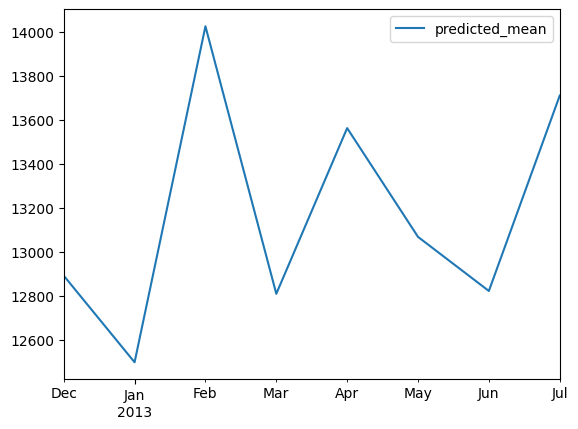

In [ ]:
pred_future.plot(legend=True)


In [ ]:
df_final=pd.DataFrame({'Date':pred_future.index, 'Total':pred_future.values})


In [ ]:
df_final['Date'] = pd.to_datetime(df_final['Date'])


In [ ]:
df_final.set_index('Date', inplace=True)


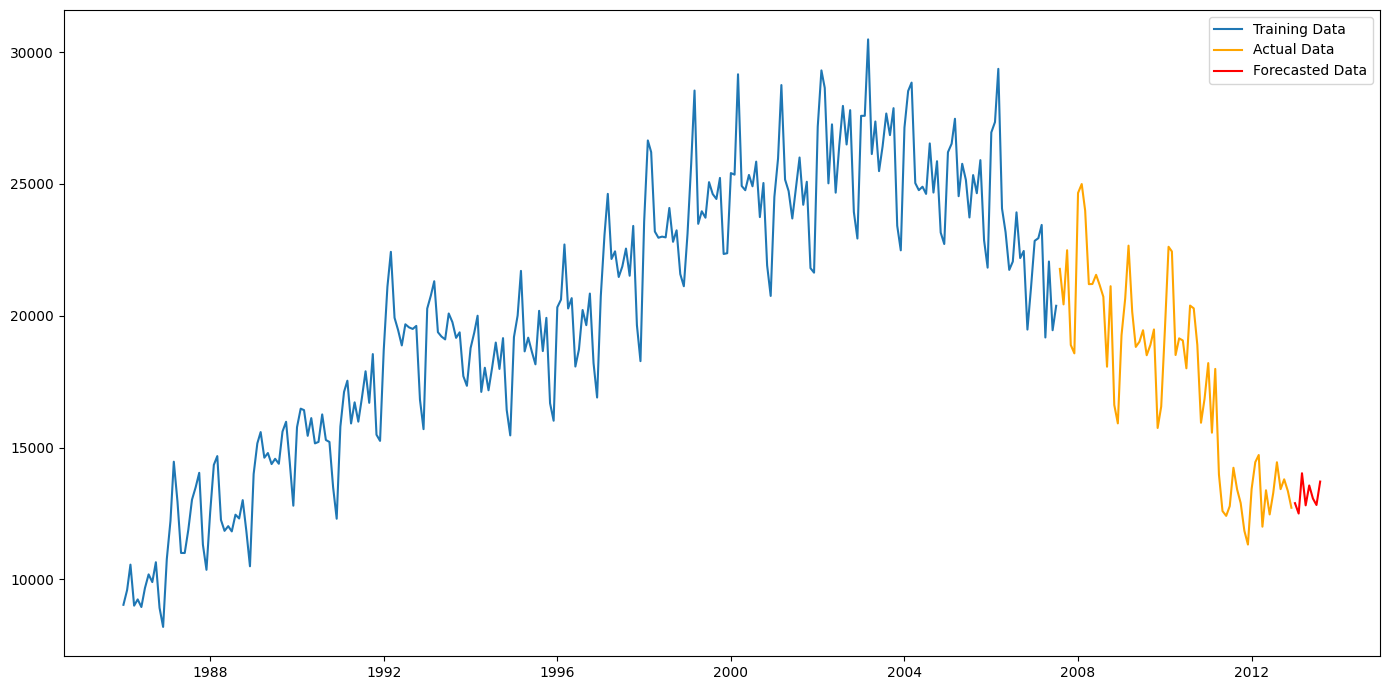

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(train_data_2.index,train_data_2['Total'],label='Training Data')
plt.plot(test_data_2.index,test_data_2['Total'], label='Actual Data', color='orange')
plt.plot(df_final.index ,df_final['Total'],label='Forecasted Data', color='red')

plt.legend()
plt.tight_layout()
plt.show()